
# 📈⏳ Stationarity and Time Series Preparation in Forecasting 🔍⚖️

### Problem Statement:

In time series forecasting, models like ARIMA and SARIMA require the data 
to be stationary. Non-stationary series (with trends or seasonality) can 
mislead the model and produce poor forecasts.

### This program demonstrates:

1. How to simulate non-stationary data.
2. Using Augmented Dickey-Fuller (ADF) Test to check stationarity.
3. Different methods to transform non-stationary data into stationary data:
   - Differencing
   - Log Transformation
   - Log + Differencing
4. Decomposition of time series into trend, seasonality, and residuals.
5. Comparing results with both visual plots and statistical tests.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# Create a non-stationary series (trend)
np.random.seed(42)
time = np.arange(1, 101)
non_stationary = 50 + 0.5*time + np.random.normal(size=100)
non_stationary

array([50.99671415, 50.8617357 , 52.14768854, 53.52302986, 52.26584663,
       52.76586304, 55.07921282, 54.76743473, 54.03052561, 55.54256004,
       55.03658231, 55.53427025, 56.74196227, 55.08671976, 55.77508217,
       57.43771247, 57.48716888, 59.31424733, 58.59197592, 58.5876963 ,
       61.96564877, 60.7742237 , 61.5675282 , 60.57525181, 61.95561728,
       63.11092259, 62.34900642, 64.37569802, 63.89936131, 64.70830625,
       64.89829339, 67.85227818, 66.48650278, 65.94228907, 68.32254491,
       66.77915635, 68.7088636 , 67.04032988, 68.17181395, 70.19686124,
       71.23846658, 71.17136828, 71.38435172, 71.6988963 , 71.02147801,
       72.28015579, 73.03936123, 75.05712223, 74.84361829, 73.23695984,
       75.82408397, 75.61491772, 75.823078  , 77.61167629, 78.53099952,
       78.93128012, 77.66078248, 78.69078762, 79.83126343, 80.97554513,
       80.02082576, 80.81434102, 80.39366503, 80.80379338, 83.31252582,
       84.35624003, 83.42798988, 85.0035329 , 84.86163603, 84.35

In [19]:
# Create a stationary series (random noise)
stationary = np.random.normal(loc=50, scale=5, size=100)
stationary

array([42.92314629, 47.89677339, 48.28642742, 45.98861365, 49.19357144,
       52.02025428, 59.43092951, 50.87288906, 51.28775195, 49.62777042,
       40.40614392, 49.86743062, 50.30115105, 62.31621056, 49.03819518,
       51.50773671, 49.82644115, 44.15660981, 55.71411407, 53.75966516,
       53.95515974, 45.45306273, 57.01397155, 42.99074469, 52.93428547,
       60.95227813, 45.04731837, 47.16851135, 50.49825683, 47.48262173,
       42.24668284, 50.34281487, 44.68848143, 52.36796215, 45.40287883,
       57.74967203, 46.08373354, 48.38969242, 54.06758609, 43.84567842,
       51.13729967, 56.53571377, 41.96258383, 50.92316929, 51.29941397,
       53.90911436, 43.81524645, 43.39771693, 52.60970783, 51.48492337,
       51.25246425, 51.73224105, 46.59987639, 51.16126849, 51.46536237,
       46.42824291, 59.32887256, 52.3691646 , 44.04348251, 53.28276804,
       45.12659165, 53.93542302, 55.7929779 , 45.89658841, 54.81688065,
       52.06390463, 54.1103008 , 59.48396491, 48.77305942, 46.23

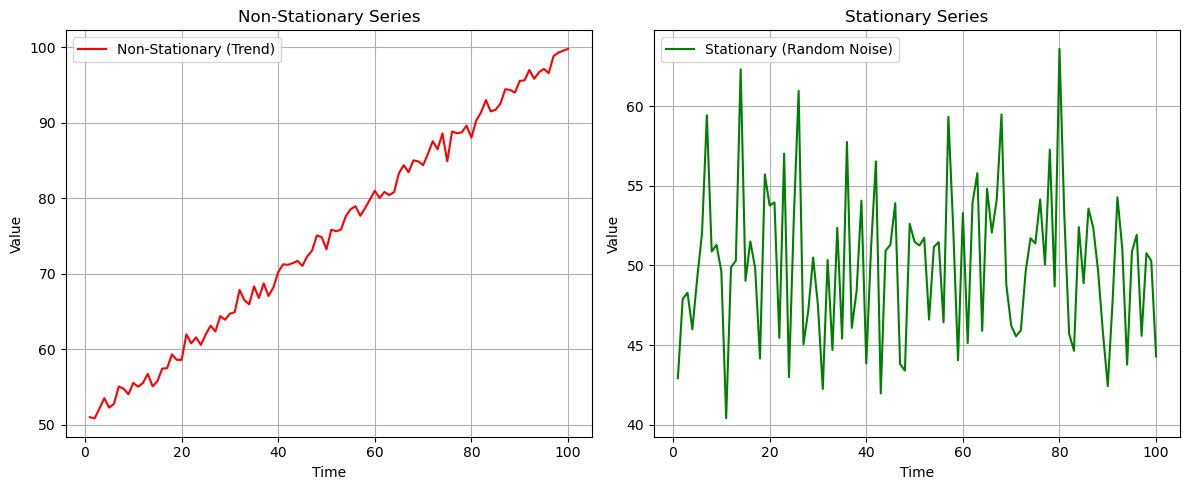

In [20]:
# Plot both
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(time, non_stationary, label="Non-Stationary (Trend)", color='red')
plt.title("Non-Stationary Series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(time, stationary, label="Stationary (Random Noise)", color='green')
plt.title("Stationary Series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Observation

Left plot (red): Mean increases over time → clear trend → non-stationary.

Right plot (green): Mean stays constant → fluctuations are random → stationary

### ADF (Augmented Dickey-Fuller) Test


The ADF test checks if a series is stationary:

•	Null hypothesis (H₀): Series is non-stationary.

•	Alternative hypothesis (H₁): Series is stationary.

If p-value < 0.05, reject H₀ → data is stationary.


In [21]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(non_stationary)
result

(0.24807855546592109,
 0.974832862599976,
 4,
 95,
 {'1%': -3.5011373281819504,
  '5%': -2.8924800524857854,
  '10%': -2.5832749307479226},
 252.40566743536073)

In [22]:
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: 0.24807855546592109
p-value: 0.974832862599976


### Observation
For our stationary series, p-value will be > 0.05 →  Do not reject H₀ → series is non-stationary.

In [23]:
stationary

array([42.92314629, 47.89677339, 48.28642742, 45.98861365, 49.19357144,
       52.02025428, 59.43092951, 50.87288906, 51.28775195, 49.62777042,
       40.40614392, 49.86743062, 50.30115105, 62.31621056, 49.03819518,
       51.50773671, 49.82644115, 44.15660981, 55.71411407, 53.75966516,
       53.95515974, 45.45306273, 57.01397155, 42.99074469, 52.93428547,
       60.95227813, 45.04731837, 47.16851135, 50.49825683, 47.48262173,
       42.24668284, 50.34281487, 44.68848143, 52.36796215, 45.40287883,
       57.74967203, 46.08373354, 48.38969242, 54.06758609, 43.84567842,
       51.13729967, 56.53571377, 41.96258383, 50.92316929, 51.29941397,
       53.90911436, 43.81524645, 43.39771693, 52.60970783, 51.48492337,
       51.25246425, 51.73224105, 46.59987639, 51.16126849, 51.46536237,
       46.42824291, 59.32887256, 52.3691646 , 44.04348251, 53.28276804,
       45.12659165, 53.93542302, 55.7929779 , 45.89658841, 54.81688065,
       52.06390463, 54.1103008 , 59.48396491, 48.77305942, 46.23

In [24]:
from statsmodels.tsa.stattools import adfuller

result1 = adfuller(stationary)
print("ADF Statistic:", result1[0])
print("p-value:", result1[1])


ADF Statistic: -10.875458876565844
p-value: 1.3352313844030283e-19


### Observation
For our stationary series, p-value will be < 0.05 →   reject H₀ → series is stationary.

### Making Data Stationary — Differencing
We can apply first-order differencing: subtract each value from the previous one.

In [17]:
# First differencing
diff_series = pd.Series(non_stationary).diff().dropna()
diff_series.head()

1   -0.134978
2    1.285953
3    1.375341
4   -1.257183
5    0.500016
dtype: float64

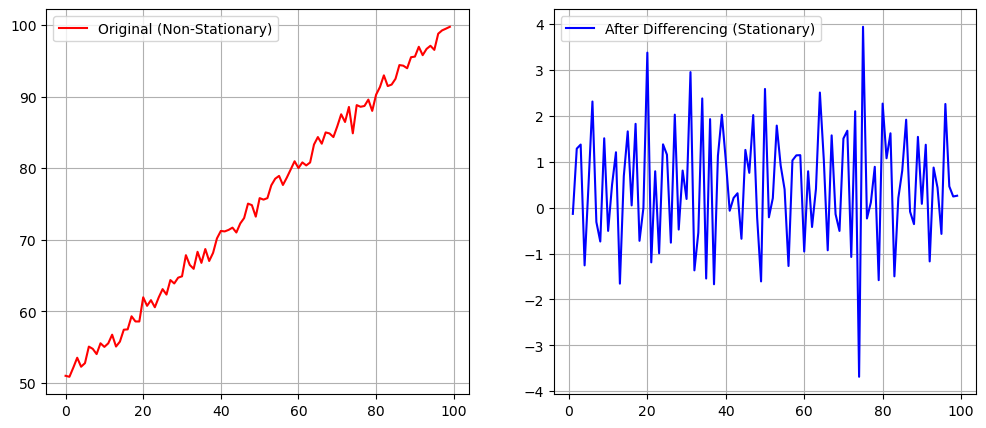

In [25]:

# Plot before and after
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(non_stationary, label="Original (Non-Stationary)", color='red')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(diff_series, label="After Differencing (Stationary)", color='blue')
plt.legend()
plt.grid(True)
plt.show()



In [26]:
# ADF test after differencing
result_diff = adfuller(diff_series)
print("After differencing - p-value:", result_diff[1])


After differencing - p-value: 9.019393985742908e-06


### Observation

After differencing, the upward trend disappears — the mean fluctuates around zero.

p-value will now be < 0.05 → series is stationary.

### Decomposition of Time Series

### Definition

Decomposition is the process of splitting a time series into its trend, seasonal, and residual (or noise) components.

### Why

Helps in understanding what’s driving changes in the data.

Allows us to remove trend/seasonality to make the series stationary for modeling.

Makes it easier to detect anomalies.



### Python Demo — Additive Model Decomposition

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


In [27]:
# Create a sample time series with trend + seasonality + noise

np.random.seed(42)
dates = pd.date_range(start="2020-01-01", periods=36, freq='M')

trend = np.linspace(50, 80, 36)  # upward trend

seasonality = 10 * np.sin(2 * np.pi * dates.month / 12)  # yearly pattern

noise = np.random.normal(0, 2, 36)  # small random noise

sales = trend + seasonality + noise

df = pd.DataFrame({"Sales": sales}, index=dates)
df.head()


,Sales
2020-01-31,55.993428
2020-02-29,59.240868
2020-03-31,63.009663
2020-04-30,64.277742
2020-05-31,57.960265


In [28]:
df.shape

(36, 1)

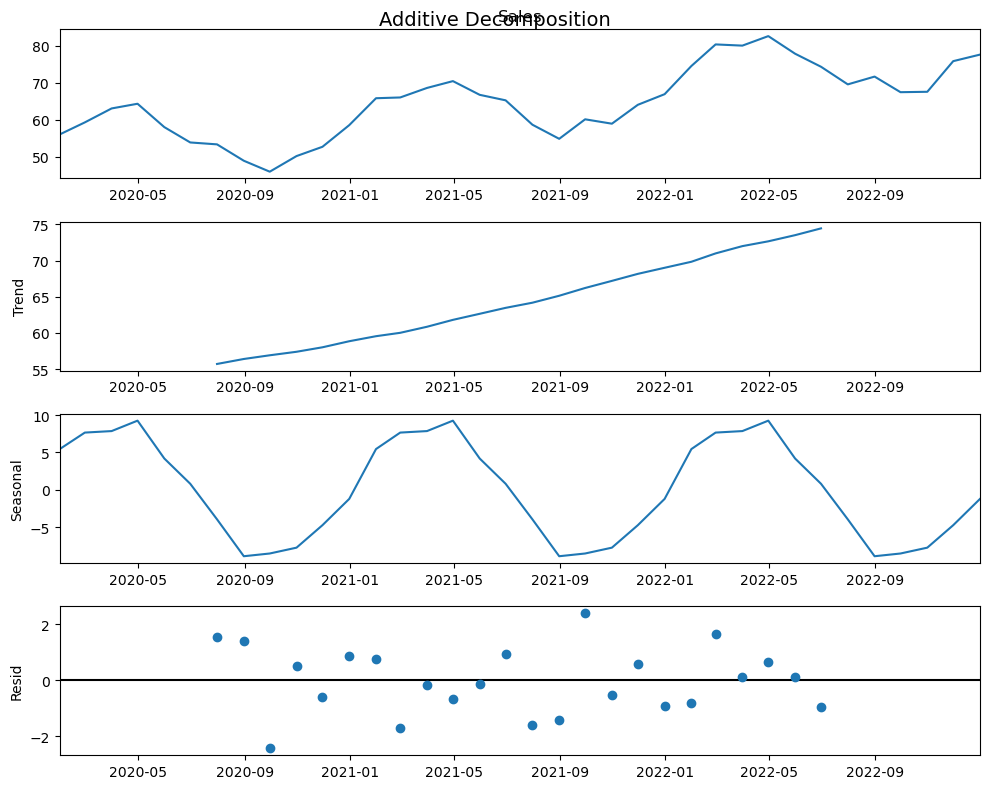

In [29]:
# Decompose the series
decomposition = seasonal_decompose(df["Sales"], model='additive', period=12)

# Plot decomposition
plt.rcParams.update({'figure.figsize': (10,8)})
decomposition.plot()
plt.suptitle("Additive Decomposition", fontsize=14)
plt.show()


### Observation

Observed → Original time series with all components mixed.

Trend → Smooth upward line showing long-term growth.

Seasonal → Repeating wave pattern showing monthly fluctuations.

Residual → Random noise after removing trend and seasonality — ideally stationary.

### Python Demo — Multiplicative Model Decomposition

If the seasonal effect grows with the trend (variance increases over time), use a multiplicative model.

In [30]:
# Create multiplicative pattern (seasonality grows with trend)
trend_mul = np.linspace(50, 80, 36)
seasonality_mul = 1 + 0.2 * np.sin(2 * np.pi * dates.month / 12)
noise_mul = np.random.normal(0, 0.02, 36)
sales_mul = trend_mul * seasonality_mul * (1 + noise_mul)

df_mul = pd.DataFrame({"Sales": sales_mul}, index=dates)
df_mul.head()

,Sales
2020-01-31,55.229750
2020-02-29,57.327350
2020-03-31,60.408674
2020-04-30,61.919904
2020-05-31,59.639443


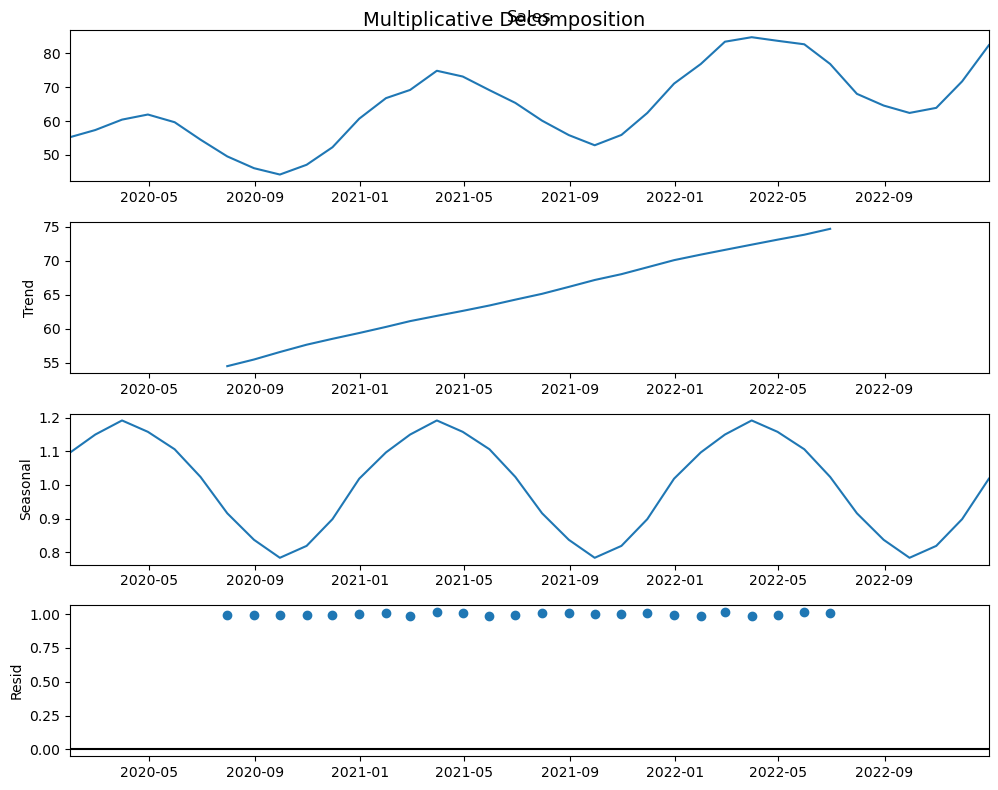

In [31]:

# Decompose (multiplicative)
decomposition_mul = seasonal_decompose(df_mul["Sales"], model='multiplicative', period=12)
decomposition_mul.plot()
plt.suptitle("Multiplicative Decomposition", fontsize=14)
plt.show()


### Observation

Seasonal amplitude increases over time.

Multiplicative decomposition is better here because it scales seasonal variation with the level of the trend.


### Summary:
- The original simulated data was non-stationary (trend present).
- The ADF test confirmed non-stationarity with high p-value (> 0.05).
- Differencing and Log+Differencing successfully made the series stationary 
  (p-value < 0.05).
- Log transformation alone only stabilized variance, but did not remove trend.
- Time series
  and residual noise.
- Stationarity check + transformation are critical first steps before 
  building forecasting models like ARIMA/SARIMA.

Key Takeaway:
Always test for stationarity, and apply appropriate transformations 
(differencing, log, or both) until the ADF test confirms the series is stationary.

